**text 전처리**

Countvector, TF-IDF 적용함

In [4]:
#data 로딩
import os
import glob

# bbc파일의 모든 문서 불러와서 data에 load
data_dir = r"C:\textmining\assignment\bbc"
categories = ['business', 'entertainment', 'politics', 'sport', 'tech']
data=[] #문서 저장 list

for category in categories:
    category_path = os.path.join(data_dir, category)
    for filename in glob.glob(os.path.join(category_path, "*.txt")):
        with open(filename, 'r', encoding='ISO-8859-1') as f:
            text = f.read()
            #words=text.split()
            data.append(text)
print(f"Loaded {len(data)} documents.")


Loaded 2225 documents.


In [67]:
for category in categories:
    category_path = os.path.join(data_dir, category)
    files = glob.glob(os.path.join(category_path, "*.txt"))
    print(f"Category: {category}, Files found: {len(files)}")  # files에 txt파일이 list 형식으로 있음

Category: business, Files found: 510
Category: entertainment, Files found: 386
Category: politics, Files found: 417
Category: sport, Files found: 511
Category: tech, Files found: 401


In [66]:
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.model_selection import train_test_split

#불용어 설정
stop_words = set(stopwords.words('english'))
#정규 표현식 (알파벳, 숫자만 허용)
pattern = r'[^a-zA-Z0-9]'

def preprocess(text):
    tokens = word_tokenize(text)
    filtered_tokens = [re.sub(pattern, '', token) for token in tokens if token.lower() not in stop_words and token != '']  # 불용어 제거 및 필터링
    return filtered_tokens

filtered_texts = [preprocess(text) for text in data] #list 형태

In [13]:
# Case1: CountVector
from sklearn.feature_extraction.text import CountVectorizer

#countervector
str_cv = [' '.join(tokens) for tokens in filtered_texts]
#알파벳으로 이루어진 단어만 추출(숫자 제거)
cv = CountVectorizer(token_pattern=r'\b[A-Za-z]+\b')
X_cv = cv.fit_transform(str_cv)

print(X_cv.shape)
print(cv.get_feature_names_out()[:100])

(2225, 30134)
['aa' 'aaa' 'aaas' 'aac' 'aadc' 'aaliyah' 'aaltra' 'aamir' 'aara' 'aarhus'
 'aaron' 'abacus' 'abandon' 'abandoned' 'abandoning' 'abandonment' 'abate'
 'abatement' 'abating' 'abba' 'abbas' 'abbasi' 'abbey' 'abbot' 'abbott'
 'abbreviated' 'abc' 'abd' 'abdellatif' 'abdication' 'abdomen' 'abdominal'
 'abducted' 'abduction' 'abdul' 'abdullah' 'abdullatif' 'abebe' 'abensur'
 'aberavon' 'aberdeen' 'aberdeenbased' 'aberration' 'aberystwyth'
 'abetting' 'abeyance' 'abeyie' 'abhorrent' 'abi' 'abide' 'abided'
 'abiding' 'abigail' 'abilities' 'ability' 'abishuly' 'abiyote' 'able'
 'ablebodied' 'abn' 'abnormal' 'abnormality' 'abolish' 'abolished'
 'abolishing' 'abolition' 'aborted' 'abortion' 'abortionist' 'abortions'
 'abortive' 'aboutroughly' 'above' 'aboveaverage' 'abraham' 'abramovich'
 'abroad' 'abruptly' 'absa' 'absence' 'absences' 'absent' 'absentee'
 'absolute' 'absolutely' 'absolution' 'absorb' 'absorbed' 'absorbing'
 'absorbs' 'abstain' 'abstentions' 'abstract' 'absurd' 'abt

In [47]:
import numpy as np

# 각 단어의 빈도 계산 (CountVectorizer의 각 단어별 합계 계산)
word_sum = np.array(X_cv.sum(axis=0)).flatten()
# 빈도수가 높은 상위 100개의 인덱스 찾기
cv_top100_idx = word_sum.argsort()[-100:][::-1]  # 내림차순

# 상위 100개의 단어와 그 빈도 출력
cv_top100_words = np.array(cv.get_feature_names_out())[cv_top100_idx]
top_100_frequencies = word_sum[cv_top100_idx]

# 단어와 빈도 출력
for word, freq in zip(cv_top100_words, top_100_frequencies):
    print(f'{word}: {freq}')


s: 8909
said: 7254
mr: 3004
would: 2631
also: 2156
people: 2044
new: 1970
us: 1932
year: 1829
one: 1763
could: 1549
last: 1381
first: 1282
nt: 1262
world: 1186
two: 1181
government: 1154
time: 1147
uk: 1082
years: 1002
best: 927
make: 927
told: 911
get: 890
game: 857
made: 856
film: 855
like: 838
music: 835
many: 829
labour: 796
next: 780
bbc: 765
back: 764
three: 762
number: 760
take: 735
added: 731
way: 726
set: 714
well: 701
says: 687
market: 686
may: 686
company: 685
home: 648
good: 642
going: 624
still: 622
england: 616
games: 615
election: 613
party: 610
much: 609
since: 607
win: 607
firm: 606
work: 603
go: 598
blair: 598
show: 593
think: 586
use: 582
say: 581
week: 575
million: 570
play: 565
part: 565
minister: 558
want: 556
public: 555
top: 554
technology: 553
second: 547
see: 544
british: 533
used: 526
players: 522
news: 518
european: 517
mobile: 515
country: 515
however: 514
tv: 504
group: 498
even: 494
expected: 493
sales: 493
end: 487
plans: 486
five: 482
already: 472
put: 

In [15]:
#Case2: TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer

#TF-IDF 벡터화
str_tfidf = [' '.join(tokens) for tokens in filtered_texts]
tfidf = TfidfVectorizer(token_pattern=r'\b[A-Za-z]+\b')
X_tfidf = tfidf.fit_transform(str_tfidf)

print(X_tfidf.shape)
print(tfidf.get_feature_names_out()[:100])

(2225, 30134)
['aa' 'aaa' 'aaas' 'aac' 'aadc' 'aaliyah' 'aaltra' 'aamir' 'aara' 'aarhus'
 'aaron' 'abacus' 'abandon' 'abandoned' 'abandoning' 'abandonment' 'abate'
 'abatement' 'abating' 'abba' 'abbas' 'abbasi' 'abbey' 'abbot' 'abbott'
 'abbreviated' 'abc' 'abd' 'abdellatif' 'abdication' 'abdomen' 'abdominal'
 'abducted' 'abduction' 'abdul' 'abdullah' 'abdullatif' 'abebe' 'abensur'
 'aberavon' 'aberdeen' 'aberdeenbased' 'aberration' 'aberystwyth'
 'abetting' 'abeyance' 'abeyie' 'abhorrent' 'abi' 'abide' 'abided'
 'abiding' 'abigail' 'abilities' 'ability' 'abishuly' 'abiyote' 'able'
 'ablebodied' 'abn' 'abnormal' 'abnormality' 'abolish' 'abolished'
 'abolishing' 'abolition' 'aborted' 'abortion' 'abortionist' 'abortions'
 'abortive' 'aboutroughly' 'above' 'aboveaverage' 'abraham' 'abramovich'
 'abroad' 'abruptly' 'absa' 'absence' 'absences' 'absent' 'absentee'
 'absolute' 'absolutely' 'absolution' 'absorb' 'absorbed' 'absorbing'
 'absorbs' 'abstain' 'abstentions' 'abstract' 'absurd' 'abt

In [48]:
import numpy as np

# 각 단어의 TF-IDF 합계 계산 (모든 문서에서 각 단어의 TF-IDF 점수를 더함)
tfidf_sum = np.array(X_tfidf.sum(axis=0)).flatten()

# TF-IDF 점수가 높은 상위 100개의 인덱스
tfidf_top100_idx = tfidf_sum.argsort()[-100:][::-1]

# 상위 100개의 단어와 TF-IDF 합계 출력
tfidf_top100_words = np.array(tfidf.get_feature_names_out())[tfidf_top100_idx]
top_100_scores = tfidf_sum[tfidf_top100_idx]

# 단어: TF-IDF 점수 출력
for word, score in zip(tfidf_top100_words, top_100_scores):
    print(f'{word}: {score:.4f}')


s: 95.0540
said: 83.8768
mr: 56.2450
would: 41.2347
us: 38.9703
people: 36.1729
year: 35.3715
new: 34.0022
also: 33.3580
one: 29.7033
film: 29.2860
could: 27.8553
government: 27.7306
last: 27.4655
nt: 27.2279
world: 26.4281
first: 26.3318
uk: 25.8514
labour: 25.5345
best: 24.7906
game: 23.8945
two: 23.7252
time: 23.0226
music: 22.1758
election: 21.1430
years: 21.0910
blair: 21.0327
england: 20.5968
told: 20.2627
number: 20.1692
make: 19.5110
party: 19.5104
get: 19.2503
next: 18.9231
market: 18.7292
made: 18.6804
bbc: 18.6484
company: 18.5793
three: 18.5752
win: 18.2540
games: 18.2312
brown: 18.0896
like: 18.0414
show: 18.0366
back: 17.9458
added: 17.9359
set: 17.8569
sales: 17.6930
many: 17.6323
growth: 17.2057
economy: 17.1793
take: 17.1719
million: 17.1159
play: 17.0958
may: 16.8407
firm: 16.8170
says: 16.6126
home: 16.6063
top: 16.5173
well: 16.4577
minister: 16.3891
mobile: 16.3466
players: 16.2871
good: 16.2669
week: 16.0587
european: 15.8627
public: 15.8188
way: 15.8131
since: 15

**분류 모델 적용**

Naïve Bayes, Logistic Regression(w. Lasso 및 Ridge), Decision Tree, Random Forest, Gradient Boosting

In [21]:
# Model1: Naive Bayes + CounterVector
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

labels = ['business', 'entertainment', 'politics', 'sport', 'tech']  # 카테고리
y=[]

for category in categories:
    category_path = os.path.join(data_dir, category)
    for filename in glob.glob(os.path.join(category_path, "*.txt")):
        y.append(category)

# train set & test set
X_train_cv, X_test_cv, y_train, y_test = train_test_split(X_cv, y, test_size=0.1, random_state=42)

# 모델 fit
nb_model = MultinomialNB()
nb_model.fit(X_train_cv, y_train)

# train /test 데이터로 예측
y_train_pred = nb_model.predict(X_train_cv)
y_test_pred = nb_model.predict(X_test_cv)

# train /test 데이터 정확도
train_accuracy = accuracy_score(y_train, y_train_pred)
print(f'Train Accuracy: {train_accuracy:.3f}')
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f'Test Accuracy: {test_accuracy:.3f}')


Train Accuracy: 0.995
Test Accuracy: 0.978


In [22]:
# 성능 평가
print('Classification Report:')
print(classification_report(y_test, y_test_pred))

Classification Report:
               precision    recall  f1-score   support

     business       0.98      0.98      0.98        58
entertainment       1.00      0.93      0.96        43
     politics       0.95      0.97      0.96        36
        sport       1.00      1.00      1.00        49
         tech       0.95      1.00      0.97        37

     accuracy                           0.98       223
    macro avg       0.98      0.98      0.98       223
 weighted avg       0.98      0.98      0.98       223



train, test의 정확도가 유사하므로 과적합없이 data에 잘 학습하고 있다.
sport 클래스는 완벽하게 예측되었고, 다른 클래스에서도 거의 완벽한 성능을 보인다.
entertainment 클래스에서 약간의 불균형이 있다.

In [43]:
# Model2: Logistic Regression + tfidf

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
X_train_tfidf, X_test_tfidf, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.1, random_state=42)

# Logistic Regression 모델 생성 및 학습
log_reg_model = LogisticRegression(max_iter=1000)  # 최대 반복 횟수를 1000으로 설정
log_reg_model.fit(X_train_tfidf, y_train)

# train /test 데이터로 예측
y_train_pred = log_reg_model.predict(X_train_tfidf)
y_test_pred = log_reg_model.predict(X_test_tfidf)

# train /test 데이터 정확도
train_accuracy = accuracy_score(y_train, y_train_pred)
print(f'Train Accuracy: {train_accuracy:.3f}')
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f'Test Accuracy: {test_accuracy:.3f}')


Train Accuracy: 0.997
Test Accuracy: 0.978


In [28]:
print('Classification Report:')
print(classification_report(y_test, y_test_pred))

Classification Report:
               precision    recall  f1-score   support

     business       0.95      1.00      0.97        58
entertainment       1.00      0.95      0.98        43
     politics       1.00      0.97      0.99        36
        sport       0.98      1.00      0.99        49
         tech       0.97      0.95      0.96        37

     accuracy                           0.98       223
    macro avg       0.98      0.97      0.98       223
 weighted avg       0.98      0.98      0.98       223



In [32]:
#Model3: DecisionTree + tfidf
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(random_state = 7)
tree.fit(X_train_tfidf, y_train)

#예측
y_pred = tree.predict(X_test_tfidf)

# 성능 평가
train_accuracy = tree.score(X_train_tfidf, y_train)
test_accuracy = accuracy_score(y_test, y_pred)

print(f'Train Accuracy: {train_accuracy:.3f}')
print(f'Test Accuracy: {test_accuracy:.3f}')

Train Accuracy: 1.000
Test Accuracy: 0.821


In [34]:
print("Classification Report:\n", classification_report(y_test, y_pred))

Classification Report:
                precision    recall  f1-score   support

     business       0.87      0.83      0.85        58
entertainment       0.81      0.60      0.69        43
     politics       0.76      0.89      0.82        36
        sport       0.91      0.98      0.94        49
         tech       0.71      0.78      0.74        37

     accuracy                           0.82       223
    macro avg       0.81      0.82      0.81       223
 weighted avg       0.82      0.82      0.82       223



In [40]:
#Model4: RandomForest + tfidf
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(random_state=7)
forest.fit(X_train_tfidf, y_train)
#예측
y_pred = forest.predict(X_test_tfidf)

# 성능 평가
train_accuracy = forest.score(X_train_tfidf, y_train)
test_accuracy = accuracy_score(y_test, y_pred)


print(f'Train Accuracy: {train_accuracy:.3f}')
print(f'Test Accuracy: {test_accuracy:.3f}')

Train Accuracy: 1.000
Test Accuracy: 0.951


In [41]:
print("Classification Report:\n", classification_report(y_test, y_pred))

Classification Report:
                precision    recall  f1-score   support

     business       0.92      0.98      0.95        58
entertainment       1.00      0.88      0.94        43
     politics       0.92      0.92      0.92        36
        sport       0.96      1.00      0.98        49
         tech       0.97      0.95      0.96        37

     accuracy                           0.95       223
    macro avg       0.95      0.95      0.95       223
 weighted avg       0.95      0.95      0.95       223



In [42]:
#Model5: GradientBoosting + CountVector
from sklearn.ensemble import GradientBoostingClassifier

gb=GradientBoostingClassifier(random_state=7) 
gb.fit(X_train_cv, y_train)

#예측
y_pred = gb.predict(X_test_cv)

# 성능 평가
train_accuracy = gb.score(X_train_cv, y_train)
test_accuracy = accuracy_score(y_test, y_pred)


print(f'Train Accuracy: {train_accuracy:.3f}')
print(f'Test Accuracy: {test_accuracy:.3f}')

Train Accuracy: 1.000
Test Accuracy: 0.951


In [44]:
print("Classification Report:\n", classification_report(y_test, y_pred))

Classification Report:
                precision    recall  f1-score   support

     business       0.90      0.98      0.94        58
entertainment       1.00      0.93      0.96        43
     politics       0.94      0.89      0.91        36
        sport       0.98      1.00      0.99        49
         tech       0.94      0.92      0.93        37

     accuracy                           0.95       223
    macro avg       0.95      0.94      0.95       223
 weighted avg       0.95      0.95      0.95       223



**WordCloud**

In [64]:
# 단어 중요도 추출하고 dic 형태로 저장
feature_importances = tree.feature_importances_
word_importances = dict(zip(tfidf.get_feature_names_out(), feature_importances))

# 각 카테고리별 주요 단어를 추출
category_words = {}
for category in set(categories):
    indices = np.where(np.array(categories) == category)[0]  # 해당 카테고리의 인덱스
    category_importances = {word: word_importances[word] for word in tfidf.get_feature_names_out() if word in word_importances}
    
    # 중요도를 기준으로 상위 80개 단어 선택
    top_words = sorted(category_importances.items(), key=lambda x: x[1], reverse=True)[:80]
    category_words[category] = dict(top_words)


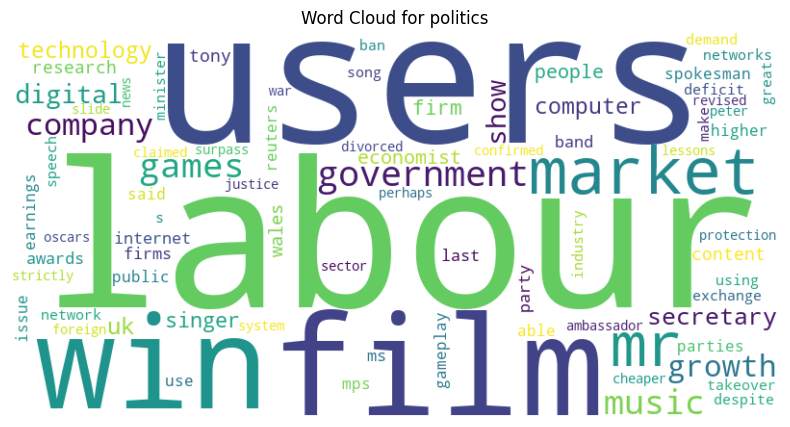

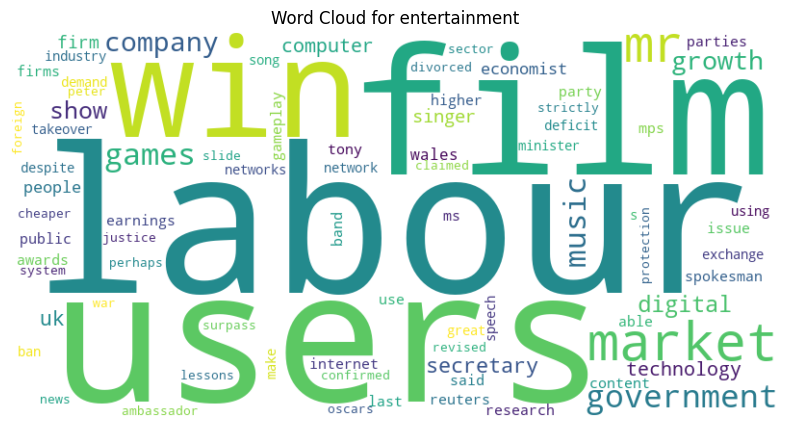

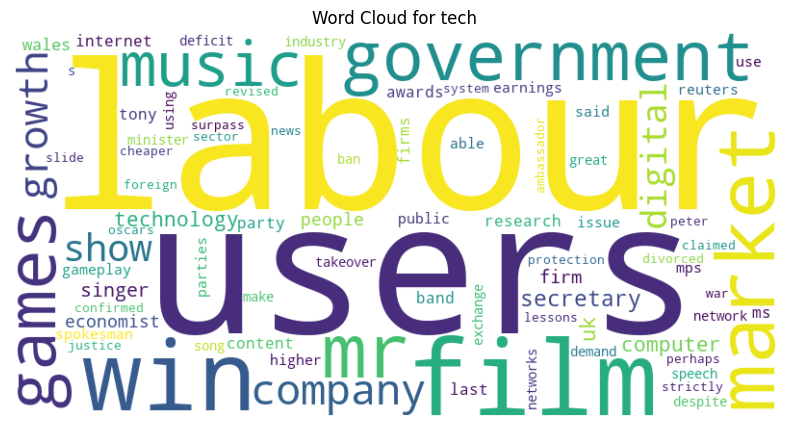

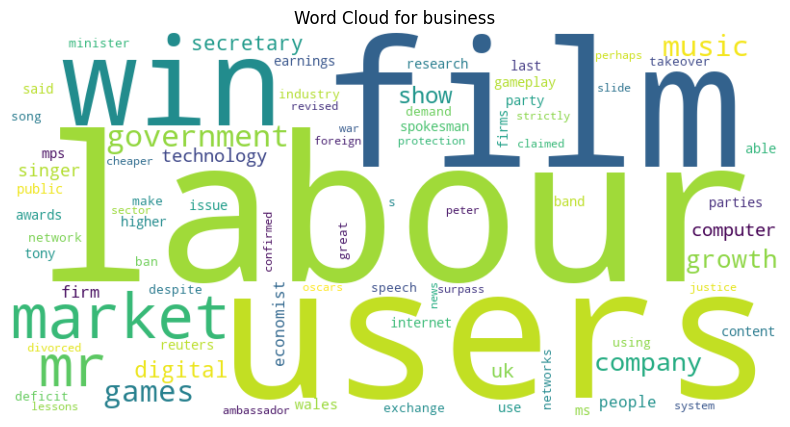

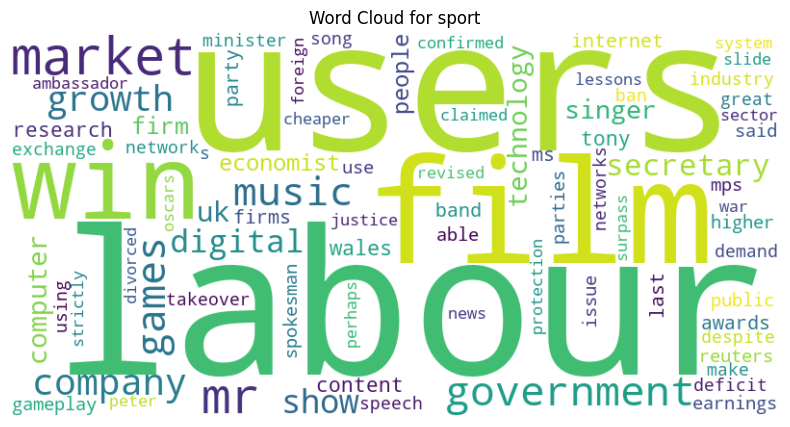

In [65]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
for category, words in category_words.items():
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(words)
    
    # Word Cloud 시각화
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')  # 축 제거
    plt.title(f'Word Cloud for {category}')
    plt.show()
